In [1]:
import synloc as s
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from mixedvines import MixedVine
import seaborn as sns

The Local resampler is expected to perform well on convex distributions. Therefore, non-convex distributions which are clustered around different spaces are selected for the simulation purpose. We first simulate the following distribution:
$$
\begin{aligned}
    x &\sim r * \cos{a} + Normal(0, 1),\\
    y &\sim 0.5 x - 0.05 x^2 + r * \sin{a} + Normal(0,1),
\end{aligned}
$$

where $r$ is 8 or 20 with same probability, and $a$ is drawn from a uniform distribution from 0 to $2\pi$. 

We locally estimate multivariate normal distribution with $k=30$ and draw synthetic values from the estimated distributions. 

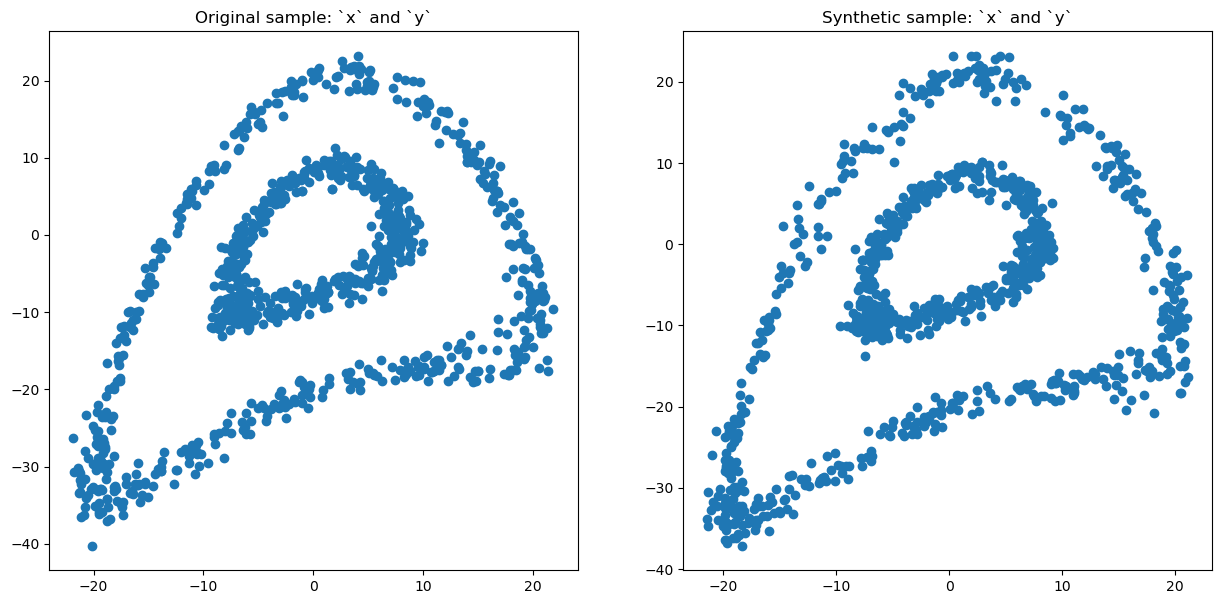

In [93]:
data = sample_trivariate_xy(1000)
syn = s.LocalCov(data)
syn.fit()

variable = ['x','y']
fig_size = (15,7)          
fig = plt.figure(figsize = fig_size)
ax1 = fig.add_subplot(121)
ax1.set_title('Original sample: `{}` and `{}`'.format(*variable))
ax1.scatter(data.x , data.y)

ax2 = fig.add_subplot(122)
ax2.set_title('Synthetic sample: `{}` and `{}`'.format(*variable))
ax2.scatter(syn.synthetic.x, syn.synthetic.y)

plt.show()

$$
\begin{aligned}
x &\sim Beta(0.1,\,0.1)\\
y &\sim Beta(0.1,\, 0.5)\\
z &\sim 10 * y + Normal(0,\,1)
\end{aligned}
$$